# -------------------EDA FOR GOLD PRICE FORCASTING----------------------

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [17]:
df = pd.read_csv(r"C:\forcasting gold price\Gold_data (1).csv")
df.head(10)

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
5,2016-01-06,2617.70
6,2016-01-07,2903.80
7,2016-01-08,2887.80
8,2016-01-09,2813.80
9,2016-01-10,2786.80


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2182 non-null   object 
 1   price   2182 non-null   float64
dtypes: float64(1), object(1)
memory usage: 34.2+ KB


In [13]:
df.describe()

,price
count,2182.000000
mean,3284.450046
std,719.564434
min,2252.600000
25%,2697.020000
50%,2879.800000
75%,4147.325000
max,4966.300000


In [14]:
df.isnull().sum()

date     0
price    0
dtype: int64

In [18]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [19]:
# Set 'date' as the index for time series analysis
df.set_index('date', inplace=True)

In [20]:
df.head(5)

,price
date,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75


# ---------------VISUALIZATION--------------

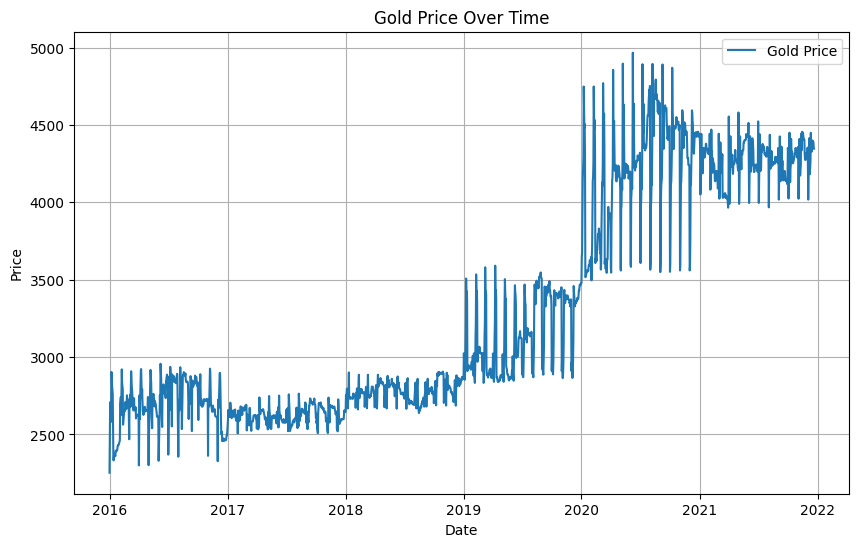

In [21]:
# Plotting the time series data to see trends
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['price'], label='Gold Price')
plt.title('Gold Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Observation:                                                                                                                                                                    
   Stable Phase: 2016 to 2018.                                                                                                                                                    
    Upward Trend: Late 2018 to 2020.                                                                                                                                             
    Price Spike: Significant increase in 2020.                                                                                                                                    
    Post-2020: Stabilized but with higher price levels and moderate fluctuations                                                                                                  

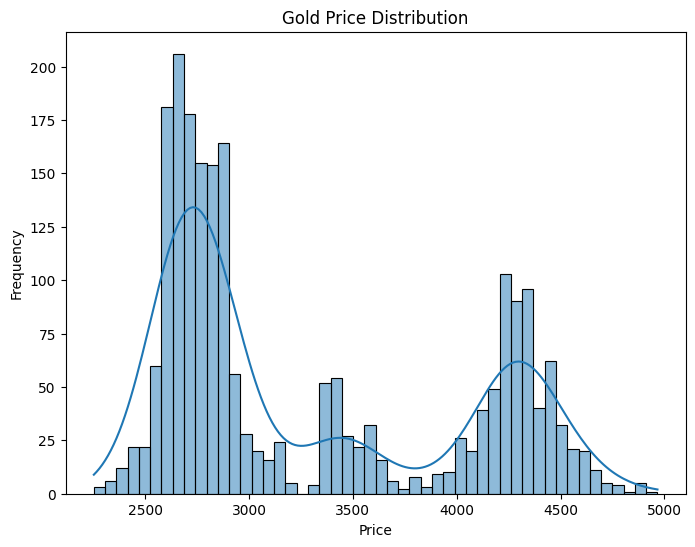

In [22]:

# Plot the distribution of prices
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Gold Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Observation:

    First Peak: Prices are concentrated heavily around 2500, reflecting stability in earlier years.
    Second Peak: A smaller but notable concentration around 4000, reflecting the price surge during 2020.
    Gap: Few occurrences between 3000 and 3500, indicating a rapid transition in price levels.

In [23]:
# Optional: Resampling data by month for better granularity (monthly mean)
df_monthly = df['price'].resample('M').mean()

C:\Users\IQRA SHAIKH\AppData\Local\Temp\ipykernel_8812\3506846726.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df['price'].resample('M').mean()


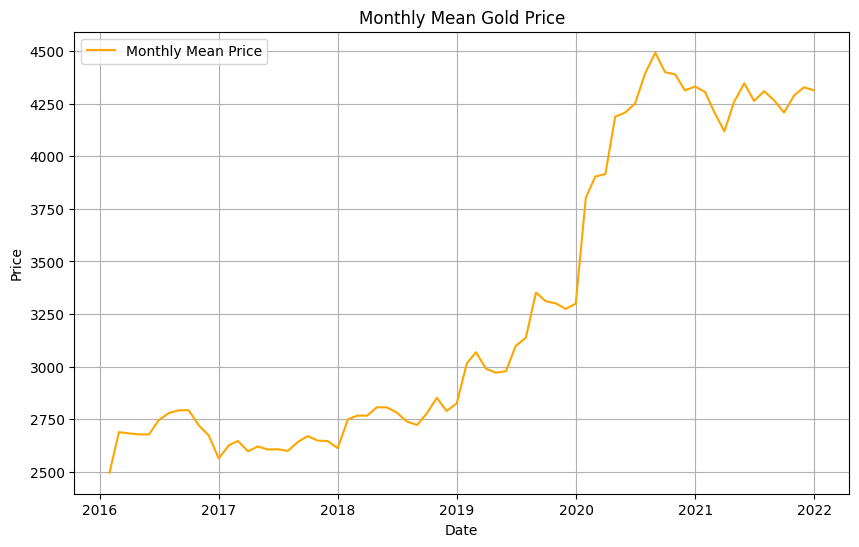

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(df_monthly, label='Monthly Mean Price', color='orange')
plt.title('Monthly Mean Gold Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot

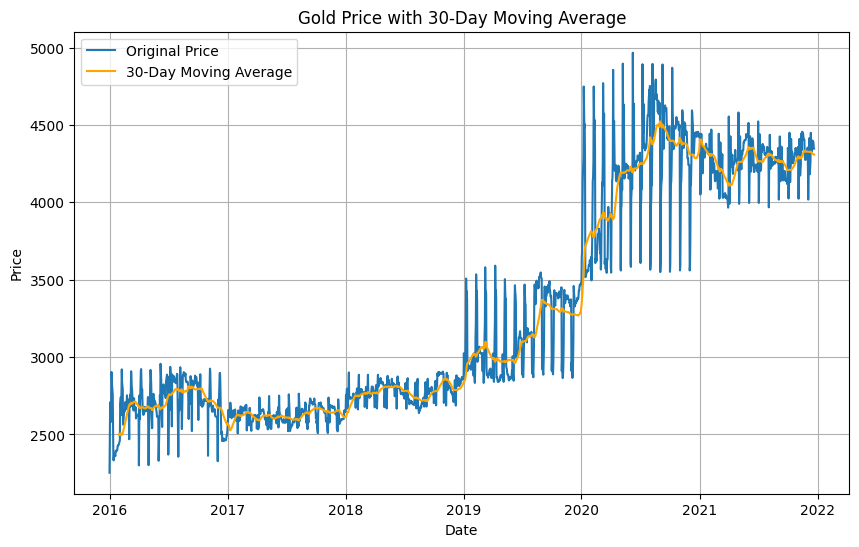

In [27]:
#Moving Average (30 days window)
df['moving_avg_30'] = df['price'].rolling(window=30).mean()

plt.figure(figsize=(10, 6))
plt.plot(df['price'], label='Original Price')
plt.plot(df['moving_avg_30'], label='30-Day Moving Average', color='orange')
plt.title('Gold Price with 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

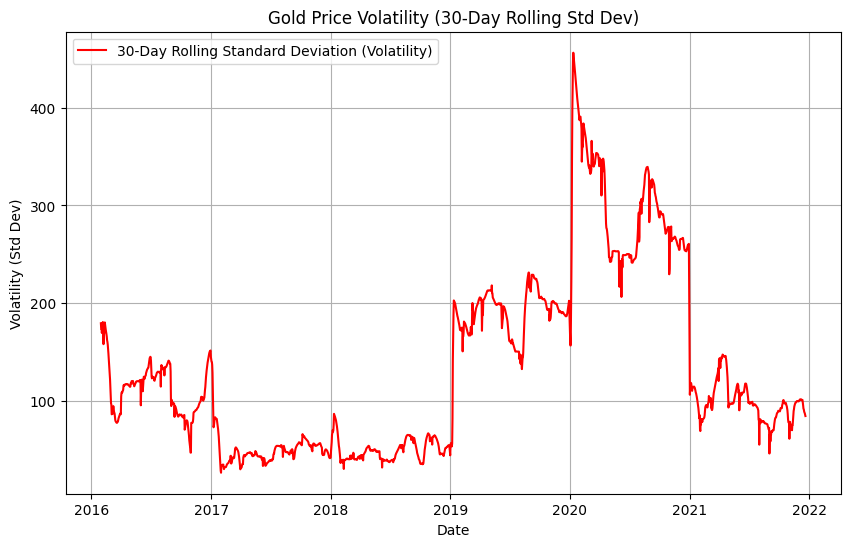

In [28]:
# 2. Rolling Standard Deviation (Price Volatility)
df['rolling_std_30'] = df['price'].rolling(window=30).std()

plt.figure(figsize=(10, 6))
plt.plot(df['rolling_std_30'], label='30-Day Rolling Standard Deviation (Volatility)', color='red')
plt.title('Gold Price Volatility (30-Day Rolling Std Dev)')
plt.xlabel('Date')
plt.ylabel('Volatility (Std Dev)')
plt.legend()
plt.grid(True)
plt.show()

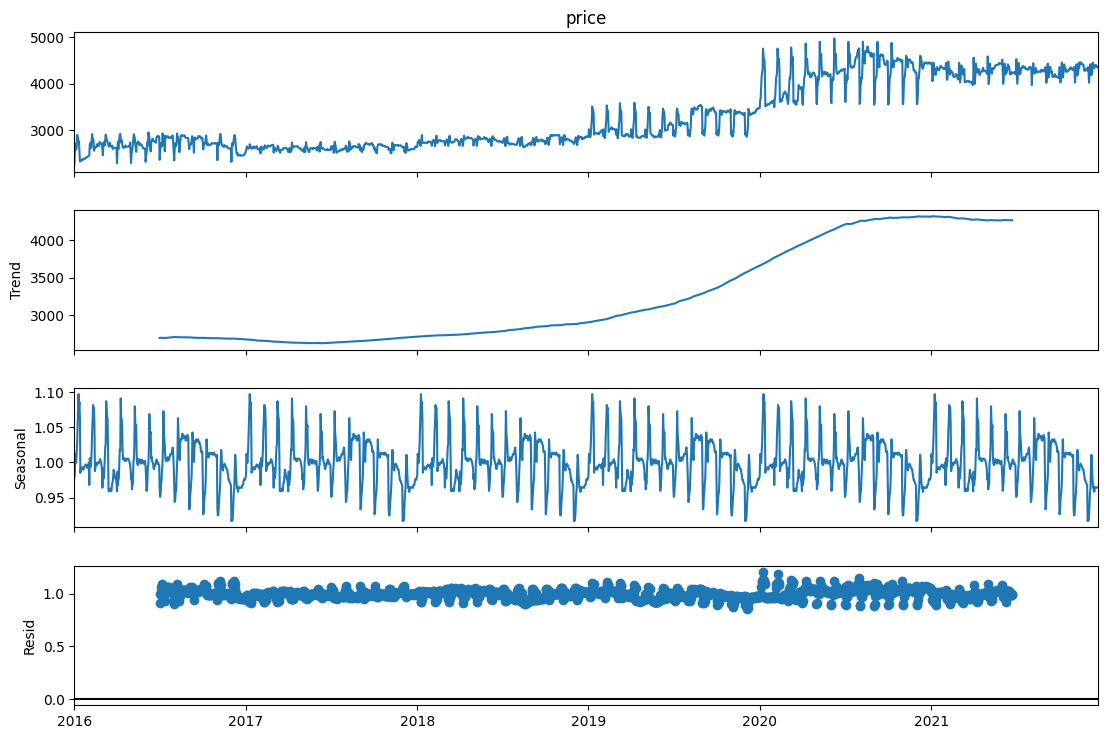

In [29]:
# 3. Seasonal Decomposition
decomposition = seasonal_decompose(df['price'], model='multiplicative', period=365)  # Assuming yearly seasonality
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()

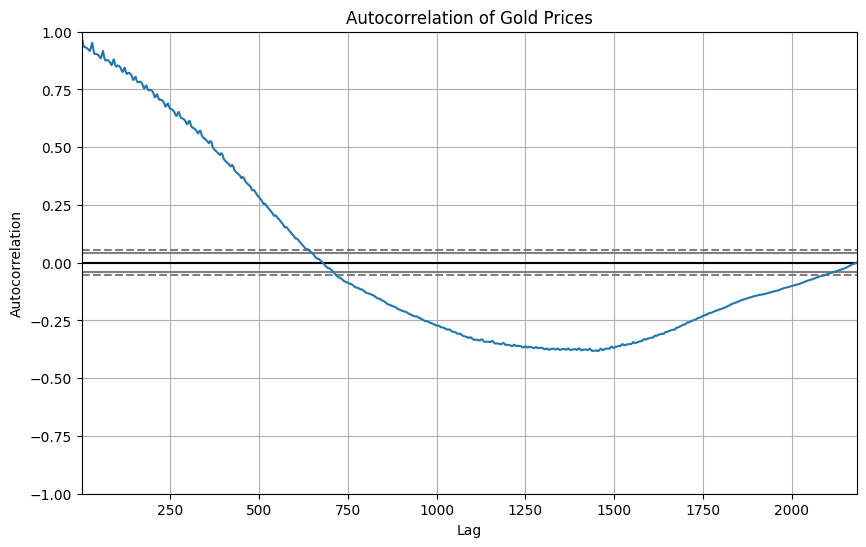

In [30]:
# 4. Autocorrelation Plot
plt.figure(figsize=(10, 6))
autocorrelation_plot(df['price'])
plt.title('Autocorrelation of Gold Prices')
plt.show()

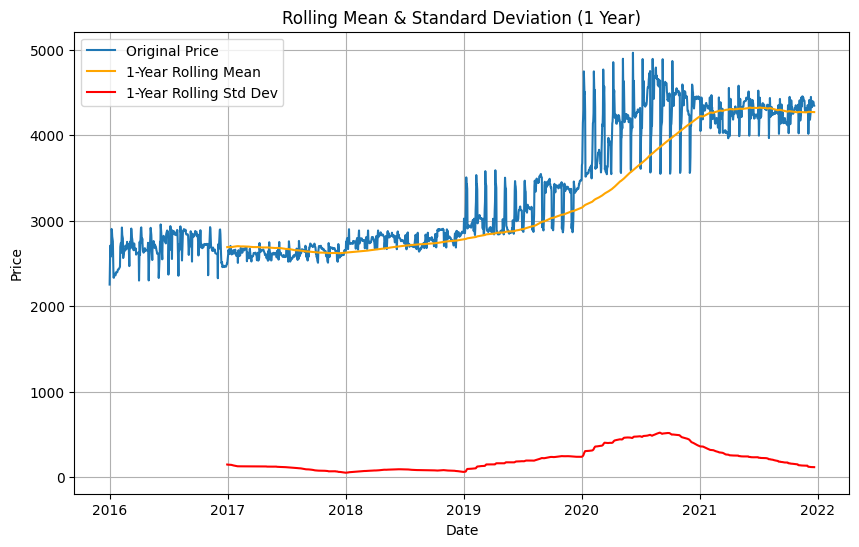

In [31]:
# 5. Rolling Mean and Rolling Standard Deviation
rolling_mean = df['price'].rolling(window=365).mean()
rolling_std = df['price'].rolling(window=365).std()

plt.figure(figsize=(10, 6))
plt.plot(df['price'], label='Original Price')
plt.plot(rolling_mean, label='1-Year Rolling Mean', color='orange')
plt.plot(rolling_std, label='1-Year Rolling Std Dev', color='red')
plt.title('Rolling Mean & Standard Deviation (1 Year)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()